# Joukowski Airfoils

# Potential Flow

In one of my first courses in aeronautical engineering, I was introduced to the mathematics behind the study of how airplanes fly. The textbook for this course was *Theoretical Hydrodynamics* by Milne-Thompson, still one of my prized possessions! Back then, computers were restricted to theose special folks who could actual touch beasts like the IBM 360 mainframe machine that powered my school, so any calculations needed in this course had to be done by hand, using a slide rule (Google that if you never saw one!)

Since we all seem to have access to computers today, and since I have retired and have the time, I decided to revisit this course and see what we can do today. In this note, We will explore the equations from that course that demonstrated the foundations of flight. In this study, we will use Python **sympy** and **numpy** to handle the math, and **matplotlib** to do some graphics work.

First, a little background is needed.

## Basic Vectors

From your high school geometry class, you should be familiar with the basic three-dimensions we typically call **x**, **y** and **z**. These three names refer to *coordinates* in space. the guy who thought up this idea was Rene Descartes. The story goes that he was lying in his bedroom watching a [fly on the ceiling](https://wild.maths.org/ren%C3%A9-descartes-and-fly-ceiling) and thought up a way to specify where that fly was located at any moment in time. The would simply measure the distance the fly was from the corner of his room along three mutually perpendicular lines that traces the walls and ceiling of his room. Today, we call this system the *cartesian coodinate system*!

In [3]:
%reload_ext tikzmagic

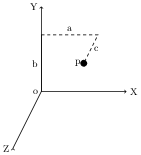

In [6]:
%%tikz
\node[left] at (0,0) {o};
\node[left] (y) at (0,3) {Y};
\draw[->](0,0) -- (0,3);
\node[right] (x) at (3,0) {X};
\draw[->] (0,0) -- (3,0);
\coordinate (z) at (-1,-2);
\draw[->] (0,0) -- (-1,-2) (z);
\node[left] (p1) at (z) {Z};

\draw[dashed] (0,2) -- node[above] {a} (2,2) -- node[right] {c} ++(-0.5,-1) node[left]  {p};
\filldraw (1.5,1) circle (3pt);
\draw (0,0) -- node[left] {b} (0,2);

The origin of this system is labeled **o** and the arrows are drawn along the *coordinate axes*. Two such axes define a *plane*. We will be focusing on things sitting on the **X-Y** plane in this discussion.

We can define a position in this coordinate system using three numbers, representing the distance alone each axis. In the diagram above point **p** is at **(a,b,c)**.


A *vector* is a quantity that describes something that has two components: magnidtude and direction. A simple example is velocity. Just stating that something is moving at some speed is not very helpful in figuring out where it is going. If we add a direction to that speed, we get something useful. We show a vector in our coordinate system using an arrow whose length indicates the magnitude (speed, for instance) and orientation indicates the direction.

If we combine position and velocity, we have something veryuseful in studying the motion of something. Let's restrict our movements to the **X-Y** plane and show an example:

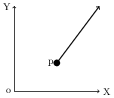

In [13]:
%%tikz
\node[left] at (0,0) {o};
\node[left] (y) at (0,3) {Y};
\draw[->](0,0) -- (0,3);
\node[right] (x) at (3,0) {X};
\draw[->] (0,0) -- (3,0);

\node[left] (p) at (1.5,1) {p};
\filldraw (1.5,1) circle (3pt);
\draw[thick,->] (1.5,1) -- (3,3);

Looking at this diagram, we get some idea where the object **p** will be moving.

## Unit Vectors

When working with vectors it is common to introduce the idea of a *unit vector*, which has direction, but the magnitude is one. We typically use unit vectors aligned with the coordinate axes, named **i**, **j**, (and **k** for 3D vectors). We use a "hat" character over these names to indicate that they are unit vectors. 

With this notation, we can define a 2D vector using component constants in each coordinate direction:
    
$$
\overrightarrow{V} = v_x \hat{\textbf{i}} + v_y \hat{\textbf{j}}
$$

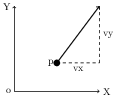

In [12]:
%%tikz
\node[left] at (0,0) {o};
\node[left] (y) at (0,3) {Y};
\draw[->](0,0) -- (0,3);
\node[right] (x) at (3,0) {X};
\draw[->] (0,0) -- (3,0);

\node[left] (p) at (1.5,1) {p};
\filldraw (1.5,1) circle (3pt);
\draw[thick,->] (1.5,1) -- (3,3);

\draw[dashed] (1.5,1)-- node[below] {vx} (3,1);
\draw[dashed] (3,1) -- node[right] {vy} (3,3);

## Vector Arithmetic

Adding two vectors is pretty simple:
    
$$
\overrightarrow{V_1} = a_1 \hat{\textbf{i}} + b_1 \hat{\textbf{j}}
$$

$$
\overrightarrow{V_2} = a_2 \hat{\textbf{i}} + b_2 \hat{\textbf{j}}
$$

$$
\overrightarrow{V_1} + \overrightarrow{V_2} = (a_1 + a_2) \hat{\textbf{i}} + (b_1 + b_2) \hat{\textbf{j}}
$$

This makes sence if you think about movements. If you walk across a moving platform, your actual motion, viewed from the ground, is a combination of both movements. Graphically, it looks like this:

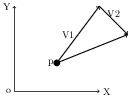

In [18]:
%%tikz
\node[left] at (0,0) {o};
\node[left] (y) at (0,3) {Y};
\draw[->](0,0) -- (0,3);
\node[right] (x) at (3,0) {X};
\draw[->] (0,0) -- (3,0);


\node[left] (p) at (1.5,1) {p};
\filldraw (1.5,1) circle (3pt);
\draw[thick,->] (1.5,1) -- node[left] {V1}(3,3);
\draw[thick,->] (3,3) -- node[above] {V2} (4,2);
\draw[thick,->] (1.5,1) -- (4,2);

## Vector Functions

Suppose we create a mathematical function that defines a velocity vector at any point in the **X-Y** plane:
   
$$
\overrightarrow{V} = f(x,y)
$$

That arrow over the **V** indicates that this is a vector quantity.

Now, let's set up a series of particles along the **Y** axis and let $F(x,y)$ show us the velocity vector of each particle. For now, let's just assume that the velocity at each point is given by:

$$
\overrightarrow{V_p} = U_\infty \hat{\textbf{i}}
$$

Which means the particle is headed to the right in our coordinate system.

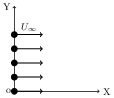

In [35]:
%%tikz
\node[left] at (0,0) {o};
\node[left] (y) at (0,3) {Y};
\draw[->](0,0) -- (0,3);
\node[right] (x) at (3,0) {X};
\draw[->] (0,0) -- (3,0);

\foreach \x in {0,0.5,1,1.5,2}
    \filldraw (0,\x) circle (3pt);
\foreach \x in {0,0.5,1,1.5,2}
    \draw[thick,->] (0,\x) -- (1,\x);
\node[above] at (0.5,2) {$U_\infty$};

If we ignore the effects of any other force, including gravity, you can probably figure out where those particles will go over some period of time:
